In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri


In [2]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

In [3]:
ptbdb_abnormal = pd.read_csv("ptbdb_abnormal.csv", header = None)
ptbdb_normal = pd.read_csv("ptbdb_normal.csv", header = None)

In [20]:
data = []

data.extend(ptbdb_normal.iloc[:, :186].values)
data.extend(ptbdb_abnormal.iloc[:, :186].values)

labels = []
labels.extend(ptbdb_normal.iloc[:, 187].values)
labels.extend(ptbdb_abnormal.iloc[:, 187].values)

data = np.array(data)
labels = np.array(labels)

print("Ukupno:")
print("U klasi abnormalnih  : ", len(ptbdb_abnormal))
print("U klasi normalnih    : ", len(ptbdb_normal))

Ukupno:
U klasi abnormalnih  :  10506
U klasi normalnih    :  4046


In [21]:
#Dataset skew, undersampling
#Izvrsiti ovu celiju ako se koristi undersampling


df_0_under = ptbdb_abnormal.sample(4046)
df_under = pd.concat([df_0_under, ptbdb_normal], axis=0)

equilibre=df_under[187].value_counts()
print("Ukupno:")
print("U klasi abnormalnih  : ", equilibre[0])
print("U klasi normalnih    : ", equilibre[1])

data = df_under.iloc[:, :186].values
labels = df_under.iloc[:, 187]

Ukupno:
U klasi abnormalnih  :  4046
U klasi normalnih    :  4046


In [33]:
#Dataset skew, oversampling
#Izvrsiti ovu celiju ako se koristi oversampling


#Oversampling
df_0_over = ptbdb_normal.sample(10506, replace = True)

df_over = pd.concat([ptbdb_abnormal, df_0_over], axis=0)

equilibre=df_over[187].value_counts()
print("Ukupno:")
print("U klasi abnormalnih  : ", equilibre[0])
print("U klasi normalnih    : ", equilibre[1])

data = df_under.iloc[:, :186].values
labels = df_under.iloc[:, 187]

Ukupno:
U klasi abnormalnih  :  10506
U klasi normalnih    :  10506


In [34]:
from keras.utils import to_categorical

one_hot_labels = np.zeros((len(labels), 2))
one_hot_labels[:] = to_categorical(labels[:], num_classes = 2)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, one_hot_labels, test_size=0.33, random_state=42)

In [36]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout, Convolution1D, MaxPooling1D, SeparableConv1D, Flatten, MaxPool1D
from keras.optimizers import Adam
from keras.models import Model

In [37]:
model_d = Sequential()

model_d.add(Dense(80, input_dim=186, init='normal', activation='relu'))
model_d.add(Dropout(0.2))
model_d.add(Dense(50, init='normal', activation='relu'))
model_d.add(Dropout(0.2))
model_d.add(Dense(30, init='normal', activation='relu'))
model_d.add(Dropout(0.2))
model_d.add(Dense(2, activation='softmax'))


C:\Users\damja\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, input_dim=186, activation="relu", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\damja\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="relu", kernel_initializer="normal")`
  """
C:\Users\damja\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="normal")`
  import sys


In [38]:
model_d.compile(optimizer = Adam(lr = 100e-5), loss="categorical_crossentropy", metrics=["accuracy"])

In [39]:
history = model_d.fit(X_train, y_train, validation_split = 0.2, epochs=30, shuffle=True, class_weight='auto')

Train on 4336 samples, validate on 1085 samples
Epoch 1/30
4336/4336 [==============================] - 0s 93us/step - loss: 0.5795 - accuracy: 0.7016 - val_loss: 0.5039 - val_accuracy: 0.7687
Epoch 2/30
4336/4336 [==============================] - 0s 52us/step - loss: 0.4534 - accuracy: 0.7973 - val_loss: 0.4397 - val_accuracy: 0.8120
Epoch 3/30
4336/4336 [==============================] - 0s 50us/step - loss: 0.4021 - accuracy: 0.8284 - val_loss: 0.4135 - val_accuracy: 0.8258
Epoch 4/30
4336/4336 [==============================] - 0s 51us/step - loss: 0.3722 - accuracy: 0.8457 - val_loss: 0.3849 - val_accuracy: 0.8461
Epoch 5/30
4336/4336 [==============================] - 0s 52us/step - loss: 0.3507 - accuracy: 0.8494 - val_loss: 0.3751 - val_accuracy: 0.8442
Epoch 6/30
4336/4336 [==============================] - 0s 52us/step - loss: 0.3265 - accuracy: 0.8711 - val_loss: 0.3496 - val_accuracy: 0.8636
Epoch 7/30
4336/4336 [==============================] - 0s 50us/step - loss: 0.302

In [40]:
print(model_d.evaluate(X_test, y_test))

2671/2671 [==============================] - 0s 21us/step
[0.21575360609903982, 0.9284911751747131]


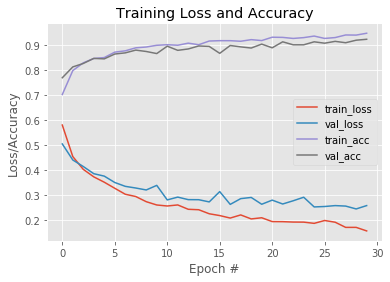

In [41]:
N = np.arange(0, 30)
title = "Training Loss and Accuracy"
 
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [42]:
predictions = model_d.predict(X_test)
predictions = np.where(predictions < 0.5, 0, 1)

In [43]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

accuracy = sklearn.metrics.accuracy_score(y_test, predictions)

print("Accuracy: {0:.2f}".format(100.0 * accuracy_score(y_test, predictions)))
print("Precision: {0:.2f}".format(100.0 * precision_score(y_test, predictions, average='micro')))
print("F1 score: {0:.2f}".format(100.0 * f1_score(y_test, predictions, average='micro')))

print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))

Accuracy: 92.85
Precision: 92.85
F1 score: 92.85
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1340
           1       0.96      0.89      0.93      1331

   micro avg       0.93      0.93      0.93      2671
   macro avg       0.93      0.93      0.93      2671
weighted avg       0.93      0.93      0.93      2671
 samples avg       0.93      0.93      0.93      2671



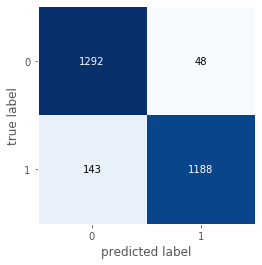

In [44]:
from mlxtend.evaluate import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

validation_numerical = np.argmax(y_test, axis = 1)
predictions_numerical = np.argmax(predictions, axis = 1)

cm = confusion_matrix(y_target=validation_numerical, 
                      y_predicted=predictions_numerical, 
                      binary=False)
cm
fig, ax = plot_confusion_matrix(cm)
plt.show()